## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   0.755290  1080.587657  0.706678  1.697052  1.682400
1  20.856960  1574.940397  0.664780  3.745436  1.604103
2  99.750208   151.469843  0.334819  3.353350  0.506778
3  65.137085  1328.838958  0.495336  3.074966  1.443132
4  99.349961  1365.254334  0.995013  4.970353  1.463770


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.38807 | train_mse: 3.69972 | train_mae: 1.46571 |  0:00:00s
epoch 1  | loss: 0.89287 | train_mse: 3.70166 | train_mae: 1.40864 |  0:00:00s


epoch 2  | loss: 0.93456 | train_mse: 3.29261 | train_mae: 1.31721 |  0:00:00s
epoch 3  | loss: 0.43722 | train_mse: 1.70321 | train_mae: 0.98755 |  0:00:00s
epoch 4  | loss: 0.28563 | train_mse: 0.75049 | train_mae: 0.69516 |  0:00:00s


epoch 5  | loss: 0.31741 | train_mse: 0.83798 | train_mae: 0.66624 |  0:00:00s
epoch 6  | loss: 0.21392 | train_mse: 1.39597 | train_mae: 0.86596 |  0:00:00s
epoch 7  | loss: 0.34608 | train_mse: 1.25858 | train_mae: 0.84332 |  0:00:00s


epoch 8  | loss: 0.29322 | train_mse: 0.66966 | train_mae: 0.59583 |  0:00:01s
epoch 9  | loss: 0.18359 | train_mse: 0.65063 | train_mae: 0.60495 |  0:00:01s
epoch 10 | loss: 0.27691 | train_mse: 0.7824  | train_mae: 0.64398 |  0:00:01s


epoch 11 | loss: 0.36981 | train_mse: 0.93139 | train_mae: 0.66942 |  0:00:01s
epoch 12 | loss: 0.40819 | train_mse: 1.00511 | train_mae: 0.73249 |  0:00:01s


epoch 13 | loss: 0.21815 | train_mse: 0.86698 | train_mae: 0.67785 |  0:00:01s


epoch 14 | loss: 0.20698 | train_mse: 0.8952  | train_mae: 0.67645 |  0:00:01s
epoch 15 | loss: 0.28331 | train_mse: 0.7958  | train_mae: 0.66235 |  0:00:01s
epoch 16 | loss: 0.17069 | train_mse: 0.69138 | train_mae: 0.61092 |  0:00:02s


epoch 17 | loss: 0.16555 | train_mse: 0.71992 | train_mae: 0.61038 |  0:00:02s
epoch 18 | loss: 0.17259 | train_mse: 0.73472 | train_mae: 0.60721 |  0:00:02s
epoch 19 | loss: 0.24055 | train_mse: 0.38856 | train_mae: 0.48533 |  0:00:02s


epoch 20 | loss: 0.22818 | train_mse: 0.2756  | train_mae: 0.43468 |  0:00:02s
epoch 21 | loss: 0.17647 | train_mse: 0.43157 | train_mae: 0.50101 |  0:00:02s
epoch 22 | loss: 0.19988 | train_mse: 0.28706 | train_mae: 0.43531 |  0:00:02s


epoch 23 | loss: 0.20454 | train_mse: 0.2466  | train_mae: 0.40461 |  0:00:02s
epoch 24 | loss: 0.17163 | train_mse: 0.26074 | train_mae: 0.42006 |  0:00:02s
epoch 25 | loss: 0.13507 | train_mse: 0.39892 | train_mae: 0.46282 |  0:00:02s


epoch 26 | loss: 0.19264 | train_mse: 0.26301 | train_mae: 0.37423 |  0:00:02s
epoch 27 | loss: 0.21115 | train_mse: 0.14521 | train_mae: 0.31139 |  0:00:02s
epoch 28 | loss: 0.23916 | train_mse: 0.1885  | train_mae: 0.33684 |  0:00:02s


epoch 29 | loss: 0.20511 | train_mse: 0.23989 | train_mae: 0.36694 |  0:00:03s
epoch 30 | loss: 0.15417 | train_mse: 0.19925 | train_mae: 0.34059 |  0:00:03s
epoch 31 | loss: 0.13887 | train_mse: 0.17099 | train_mae: 0.30257 |  0:00:03s
epoch 32 | loss: 0.14489 | train_mse: 0.16505 | train_mae: 0.29759 |  0:00:03s


epoch 33 | loss: 0.28243 | train_mse: 0.24055 | train_mae: 0.37758 |  0:00:03s
epoch 34 | loss: 0.20569 | train_mse: 0.20838 | train_mae: 0.35421 |  0:00:03s
epoch 35 | loss: 0.15986 | train_mse: 0.11255 | train_mae: 0.25663 |  0:00:03s


epoch 36 | loss: 0.15324 | train_mse: 0.13611 | train_mae: 0.2891  |  0:00:03s
epoch 37 | loss: 0.16409 | train_mse: 0.11523 | train_mae: 0.26407 |  0:00:03s
epoch 38 | loss: 0.15932 | train_mse: 0.0913  | train_mae: 0.22905 |  0:00:03s
epoch 39 | loss: 0.15876 | train_mse: 0.10409 | train_mae: 0.25147 |  0:00:03s


epoch 40 | loss: 0.18159 | train_mse: 0.10791 | train_mae: 0.25713 |  0:00:03s
epoch 41 | loss: 0.163   | train_mse: 0.10049 | train_mae: 0.25313 |  0:00:03s
epoch 42 | loss: 0.20233 | train_mse: 0.11469 | train_mae: 0.26434 |  0:00:03s
epoch 43 | loss: 0.12801 | train_mse: 0.1489  | train_mae: 0.2843  |  0:00:03s


epoch 44 | loss: 0.13358 | train_mse: 0.09715 | train_mae: 0.2363  |  0:00:04s
epoch 45 | loss: 0.11993 | train_mse: 0.10165 | train_mae: 0.23724 |  0:00:04s
epoch 46 | loss: 0.15366 | train_mse: 0.11893 | train_mae: 0.25891 |  0:00:04s
epoch 47 | loss: 0.22887 | train_mse: 0.14502 | train_mae: 0.2982  |  0:00:04s


epoch 48 | loss: 0.1839  | train_mse: 0.17988 | train_mae: 0.30814 |  0:00:04s
epoch 49 | loss: 0.18013 | train_mse: 0.13786 | train_mae: 0.27931 |  0:00:04s
epoch 50 | loss: 0.13383 | train_mse: 0.09211 | train_mae: 0.24478 |  0:00:04s


epoch 51 | loss: 0.12887 | train_mse: 0.10023 | train_mae: 0.25516 |  0:00:04s
epoch 52 | loss: 0.12009 | train_mse: 0.09025 | train_mae: 0.24272 |  0:00:04s
epoch 53 | loss: 0.1254  | train_mse: 0.10984 | train_mae: 0.25492 |  0:00:04s
epoch 54 | loss: 0.17793 | train_mse: 0.1053  | train_mae: 0.25138 |  0:00:04s


epoch 55 | loss: 0.12461 | train_mse: 0.10691 | train_mae: 0.24611 |  0:00:04s
epoch 56 | loss: 0.1643  | train_mse: 0.08431 | train_mae: 0.22941 |  0:00:04s
epoch 57 | loss: 0.08276 | train_mse: 0.09929 | train_mae: 0.24347 |  0:00:04s
epoch 58 | loss: 0.11049 | train_mse: 0.10478 | train_mae: 0.24845 |  0:00:04s


epoch 59 | loss: 0.15248 | train_mse: 0.08495 | train_mae: 0.21862 |  0:00:05s
epoch 60 | loss: 0.09473 | train_mse: 0.08671 | train_mae: 0.22301 |  0:00:05s
epoch 61 | loss: 0.11151 | train_mse: 0.08635 | train_mae: 0.21862 |  0:00:05s
epoch 62 | loss: 0.1793  | train_mse: 0.08418 | train_mae: 0.22056 |  0:00:05s


epoch 63 | loss: 0.20533 | train_mse: 0.07837 | train_mae: 0.22307 |  0:00:05s
epoch 64 | loss: 0.18032 | train_mse: 0.08184 | train_mae: 0.23252 |  0:00:05s
epoch 65 | loss: 0.11052 | train_mse: 0.07116 | train_mae: 0.21486 |  0:00:05s


epoch 66 | loss: 0.13038 | train_mse: 0.06852 | train_mae: 0.20805 |  0:00:05s
epoch 67 | loss: 0.13403 | train_mse: 0.08845 | train_mae: 0.23113 |  0:00:05s
epoch 68 | loss: 0.22795 | train_mse: 0.08808 | train_mae: 0.22774 |  0:00:05s
epoch 69 | loss: 0.1523  | train_mse: 0.08271 | train_mae: 0.22317 |  0:00:05s


epoch 70 | loss: 0.1295  | train_mse: 0.07348 | train_mae: 0.22066 |  0:00:05s
epoch 71 | loss: 0.10749 | train_mse: 0.08732 | train_mae: 0.22251 |  0:00:05s
epoch 72 | loss: 0.10349 | train_mse: 0.07181 | train_mae: 0.21072 |  0:00:05s
epoch 73 | loss: 0.09498 | train_mse: 0.09506 | train_mae: 0.23118 |  0:00:05s


epoch 74 | loss: 0.23719 | train_mse: 0.08915 | train_mae: 0.23159 |  0:00:06s
epoch 75 | loss: 0.11912 | train_mse: 0.07177 | train_mae: 0.20973 |  0:00:06s
epoch 76 | loss: 0.11304 | train_mse: 0.07742 | train_mae: 0.21647 |  0:00:06s
epoch 77 | loss: 0.09484 | train_mse: 0.08278 | train_mae: 0.2191  |  0:00:06s


epoch 78 | loss: 0.10287 | train_mse: 0.07646 | train_mae: 0.20683 |  0:00:06s
epoch 79 | loss: 0.1079  | train_mse: 0.07848 | train_mae: 0.20868 |  0:00:06s
epoch 80 | loss: 0.17611 | train_mse: 0.11489 | train_mae: 0.24868 |  0:00:06s


epoch 81 | loss: 0.12867 | train_mse: 0.12572 | train_mae: 0.25427 |  0:00:06s
epoch 82 | loss: 0.22004 | train_mse: 0.11119 | train_mae: 0.24104 |  0:00:06s
epoch 83 | loss: 0.32299 | train_mse: 0.09696 | train_mae: 0.23316 |  0:00:06s
epoch 84 | loss: 0.10121 | train_mse: 0.08161 | train_mae: 0.2169  |  0:00:06s


epoch 85 | loss: 0.10043 | train_mse: 0.08019 | train_mae: 0.21713 |  0:00:06s
epoch 86 | loss: 0.09949 | train_mse: 0.08373 | train_mae: 0.23141 |  0:00:06s
epoch 87 | loss: 0.08449 | train_mse: 0.07241 | train_mae: 0.21634 |  0:00:06s
epoch 88 | loss: 0.08523 | train_mse: 0.07271 | train_mae: 0.21012 |  0:00:07s


epoch 89 | loss: 0.15007 | train_mse: 0.06306 | train_mae: 0.19351 |  0:00:07s
epoch 90 | loss: 0.08378 | train_mse: 0.07473 | train_mae: 0.21451 |  0:00:07s


epoch 91 | loss: 0.13119 | train_mse: 0.07901 | train_mae: 0.21865 |  0:00:07s
epoch 92 | loss: 0.09597 | train_mse: 0.07406 | train_mae: 0.21631 |  0:00:07s
epoch 93 | loss: 0.07155 | train_mse: 0.0754  | train_mae: 0.21884 |  0:00:07s


epoch 94 | loss: 0.10914 | train_mse: 0.07632 | train_mae: 0.21689 |  0:00:07s
epoch 95 | loss: 0.08694 | train_mse: 0.07262 | train_mae: 0.21457 |  0:00:07s
epoch 96 | loss: 0.07799 | train_mse: 0.07652 | train_mae: 0.21534 |  0:00:07s
epoch 97 | loss: 0.08701 | train_mse: 0.07501 | train_mae: 0.20832 |  0:00:07s


epoch 98 | loss: 0.08398 | train_mse: 0.06236 | train_mae: 0.19095 |  0:00:07s
epoch 99 | loss: 0.1126  | train_mse: 0.05983 | train_mae: 0.18651 |  0:00:07s
epoch 100| loss: 0.0814  | train_mse: 0.05397 | train_mae: 0.18344 |  0:00:07s


epoch 101| loss: 0.1615  | train_mse: 0.06735 | train_mae: 0.19885 |  0:00:08s
epoch 102| loss: 0.10197 | train_mse: 0.05529 | train_mae: 0.19209 |  0:00:08s
epoch 103| loss: 0.09453 | train_mse: 0.05394 | train_mae: 0.18634 |  0:00:08s
epoch 104| loss: 0.08787 | train_mse: 0.05891 | train_mae: 0.19231 |  0:00:08s


epoch 105| loss: 0.12104 | train_mse: 0.05864 | train_mae: 0.19163 |  0:00:08s
epoch 106| loss: 0.13323 | train_mse: 0.05911 | train_mae: 0.19258 |  0:00:08s
epoch 107| loss: 0.10053 | train_mse: 0.08339 | train_mae: 0.21413 |  0:00:08s


epoch 108| loss: 0.10729 | train_mse: 0.07334 | train_mae: 0.20741 |  0:00:08s
epoch 109| loss: 0.0961  | train_mse: 0.05736 | train_mae: 0.19253 |  0:00:08s
epoch 110| loss: 0.09905 | train_mse: 0.05081 | train_mae: 0.17958 |  0:00:08s
epoch 111| loss: 0.0972  | train_mse: 0.05071 | train_mae: 0.17326 |  0:00:08s


epoch 112| loss: 0.09925 | train_mse: 0.07781 | train_mae: 0.20359 |  0:00:08s
epoch 113| loss: 0.12328 | train_mse: 0.07761 | train_mae: 0.20983 |  0:00:08s
epoch 114| loss: 0.12023 | train_mse: 0.05813 | train_mae: 0.18942 |  0:00:08s
epoch 115| loss: 0.15472 | train_mse: 0.07268 | train_mae: 0.21132 |  0:00:08s


epoch 116| loss: 0.14327 | train_mse: 0.05725 | train_mae: 0.18289 |  0:00:09s
epoch 117| loss: 0.05606 | train_mse: 0.04995 | train_mae: 0.17244 |  0:00:09s
epoch 118| loss: 0.1015  | train_mse: 0.05368 | train_mae: 0.17754 |  0:00:09s
epoch 119| loss: 0.08271 | train_mse: 0.05056 | train_mae: 0.16955 |  0:00:09s


epoch 120| loss: 0.07427 | train_mse: 0.04825 | train_mae: 0.16723 |  0:00:09s
epoch 121| loss: 0.1071  | train_mse: 0.05599 | train_mae: 0.1875  |  0:00:09s
epoch 122| loss: 0.07947 | train_mse: 0.07602 | train_mae: 0.21208 |  0:00:09s


epoch 123| loss: 0.10054 | train_mse: 0.05993 | train_mae: 0.19227 |  0:00:09s
epoch 124| loss: 0.09573 | train_mse: 0.07084 | train_mae: 0.20658 |  0:00:09s
epoch 125| loss: 0.13979 | train_mse: 0.05889 | train_mae: 0.18965 |  0:00:09s


epoch 126| loss: 0.14164 | train_mse: 0.08529 | train_mae: 0.21359 |  0:00:09s
epoch 127| loss: 0.23011 | train_mse: 0.1334  | train_mae: 0.25668 |  0:00:09s
epoch 128| loss: 0.13711 | train_mse: 0.10314 | train_mae: 0.23475 |  0:00:09s
epoch 129| loss: 0.15931 | train_mse: 0.10164 | train_mae: 0.24382 |  0:00:09s


epoch 130| loss: 0.0884  | train_mse: 0.07808 | train_mae: 0.22347 |  0:00:09s
epoch 131| loss: 0.09663 | train_mse: 0.07255 | train_mae: 0.21674 |  0:00:10s
epoch 132| loss: 0.15578 | train_mse: 0.06671 | train_mae: 0.20754 |  0:00:10s


epoch 133| loss: 0.10925 | train_mse: 0.06223 | train_mae: 0.20132 |  0:00:10s
epoch 134| loss: 0.0651  | train_mse: 0.06624 | train_mae: 0.21284 |  0:00:10s
epoch 135| loss: 0.06221 | train_mse: 0.05918 | train_mae: 0.20092 |  0:00:10s


epoch 136| loss: 0.06227 | train_mse: 0.04134 | train_mae: 0.16553 |  0:00:10s
epoch 137| loss: 0.0806  | train_mse: 0.04066 | train_mae: 0.16426 |  0:00:10s
epoch 138| loss: 0.09283 | train_mse: 0.04079 | train_mae: 0.16338 |  0:00:10s


epoch 139| loss: 0.08995 | train_mse: 0.05309 | train_mae: 0.18316 |  0:00:10s
epoch 140| loss: 0.15866 | train_mse: 0.07468 | train_mae: 0.20698 |  0:00:10s
epoch 141| loss: 0.09707 | train_mse: 0.06215 | train_mae: 0.19644 |  0:00:10s
epoch 142| loss: 0.10928 | train_mse: 0.04587 | train_mae: 0.17553 |  0:00:10s


epoch 143| loss: 0.08039 | train_mse: 0.06315 | train_mae: 0.19868 |  0:00:10s
epoch 144| loss: 0.09996 | train_mse: 0.07374 | train_mae: 0.20803 |  0:00:10s
epoch 145| loss: 0.07793 | train_mse: 0.05984 | train_mae: 0.1926  |  0:00:11s
epoch 146| loss: 0.14296 | train_mse: 0.05941 | train_mae: 0.19583 |  0:00:11s


epoch 147| loss: 0.08578 | train_mse: 0.07385 | train_mae: 0.20862 |  0:00:11s
epoch 148| loss: 0.20687 | train_mse: 0.06495 | train_mae: 0.19516 |  0:00:11s
epoch 149| loss: 0.1464  | train_mse: 0.05038 | train_mae: 0.1788  |  0:00:11s


epoch 150| loss: 0.06995 | train_mse: 0.05692 | train_mae: 0.18482 |  0:00:11s
epoch 151| loss: 0.10535 | train_mse: 0.06418 | train_mae: 0.20318 |  0:00:11s
epoch 152| loss: 0.088   | train_mse: 0.07971 | train_mae: 0.22975 |  0:00:11s


epoch 153| loss: 0.08726 | train_mse: 0.07561 | train_mae: 0.22393 |  0:00:11s
epoch 154| loss: 0.1255  | train_mse: 0.06335 | train_mae: 0.20105 |  0:00:11s
epoch 155| loss: 0.06181 | train_mse: 0.05144 | train_mae: 0.1794  |  0:00:11s
epoch 156| loss: 0.08657 | train_mse: 0.04759 | train_mae: 0.17467 |  0:00:11s


epoch 157| loss: 0.08374 | train_mse: 0.04462 | train_mae: 0.16992 |  0:00:11s
epoch 158| loss: 0.06582 | train_mse: 0.0422  | train_mae: 0.16506 |  0:00:11s
epoch 159| loss: 0.08673 | train_mse: 0.04949 | train_mae: 0.17658 |  0:00:11s
epoch 160| loss: 0.08403 | train_mse: 0.05693 | train_mae: 0.18927 |  0:00:12s


epoch 161| loss: 0.09921 | train_mse: 0.06319 | train_mae: 0.19694 |  0:00:12s
epoch 162| loss: 0.09489 | train_mse: 0.05855 | train_mae: 0.19628 |  0:00:12s
epoch 163| loss: 0.1293  | train_mse: 0.05674 | train_mae: 0.19901 |  0:00:12s


epoch 164| loss: 0.08043 | train_mse: 0.05749 | train_mae: 0.19455 |  0:00:12s
epoch 165| loss: 0.0708  | train_mse: 0.05561 | train_mae: 0.18874 |  0:00:12s
epoch 166| loss: 0.07983 | train_mse: 0.05983 | train_mae: 0.19356 |  0:00:12s


epoch 167| loss: 0.07489 | train_mse: 0.06079 | train_mae: 0.1958  |  0:00:12s
epoch 168| loss: 0.11672 | train_mse: 0.05433 | train_mae: 0.18625 |  0:00:12s
epoch 169| loss: 0.12489 | train_mse: 0.05821 | train_mae: 0.18999 |  0:00:12s
epoch 170| loss: 0.08681 | train_mse: 0.05265 | train_mae: 0.18197 |  0:00:12s


epoch 171| loss: 0.07469 | train_mse: 0.04295 | train_mae: 0.1675  |  0:00:12s
epoch 172| loss: 0.08727 | train_mse: 0.04337 | train_mae: 0.16815 |  0:00:12s
epoch 173| loss: 0.07895 | train_mse: 0.04408 | train_mae: 0.16784 |  0:00:12s
epoch 174| loss: 0.06577 | train_mse: 0.04087 | train_mae: 0.16646 |  0:00:12s


epoch 175| loss: 0.05951 | train_mse: 0.03876 | train_mae: 0.16126 |  0:00:13s
epoch 176| loss: 0.1012  | train_mse: 0.05207 | train_mae: 0.17948 |  0:00:13s
epoch 177| loss: 0.16841 | train_mse: 0.05903 | train_mae: 0.18839 |  0:00:13s
epoch 178| loss: 0.08918 | train_mse: 0.05637 | train_mae: 0.18979 |  0:00:13s


epoch 179| loss: 0.06422 | train_mse: 0.04267 | train_mae: 0.16869 |  0:00:13s
epoch 180| loss: 0.1021  | train_mse: 0.04444 | train_mae: 0.17232 |  0:00:13s
epoch 181| loss: 0.13056 | train_mse: 0.05834 | train_mae: 0.20058 |  0:00:13s


epoch 182| loss: 0.10402 | train_mse: 0.05822 | train_mae: 0.19794 |  0:00:13s
epoch 183| loss: 0.08797 | train_mse: 0.05724 | train_mae: 0.18796 |  0:00:13s
epoch 184| loss: 0.1224  | train_mse: 0.0624  | train_mae: 0.19873 |  0:00:13s
epoch 185| loss: 0.06717 | train_mse: 0.06422 | train_mae: 0.20571 |  0:00:13s


epoch 186| loss: 0.06957 | train_mse: 0.06831 | train_mae: 0.21017 |  0:00:13s
epoch 187| loss: 0.09728 | train_mse: 0.05848 | train_mae: 0.19876 |  0:00:13s
epoch 188| loss: 0.08176 | train_mse: 0.05063 | train_mae: 0.17893 |  0:00:13s
epoch 189| loss: 0.08854 | train_mse: 0.04519 | train_mae: 0.1696  |  0:00:14s


epoch 190| loss: 0.04314 | train_mse: 0.04624 | train_mae: 0.17242 |  0:00:14s
epoch 191| loss: 0.057   | train_mse: 0.05004 | train_mae: 0.16884 |  0:00:14s
epoch 192| loss: 0.14336 | train_mse: 0.06722 | train_mae: 0.19727 |  0:00:14s
epoch 193| loss: 0.08313 | train_mse: 0.05774 | train_mae: 0.18872 |  0:00:14s


epoch 194| loss: 0.10784 | train_mse: 0.05068 | train_mae: 0.18086 |  0:00:14s
epoch 195| loss: 0.13505 | train_mse: 0.07162 | train_mae: 0.20137 |  0:00:14s
epoch 196| loss: 0.13346 | train_mse: 0.08597 | train_mae: 0.22398 |  0:00:14s


epoch 197| loss: 0.07573 | train_mse: 0.07267 | train_mae: 0.20681 |  0:00:14s
epoch 198| loss: 0.07402 | train_mse: 0.05431 | train_mae: 0.18285 |  0:00:14s
epoch 199| loss: 0.07154 | train_mse: 0.05347 | train_mae: 0.18208 |  0:00:14s
epoch 200| loss: 0.11598 | train_mse: 0.04576 | train_mae: 0.16928 |  0:00:14s


epoch 201| loss: 0.08099 | train_mse: 0.04838 | train_mae: 0.17985 |  0:00:14s
epoch 202| loss: 0.08952 | train_mse: 0.04648 | train_mae: 0.17451 |  0:00:14s
epoch 203| loss: 0.04675 | train_mse: 0.04163 | train_mae: 0.16257 |  0:00:14s
epoch 204| loss: 0.05953 | train_mse: 0.03746 | train_mae: 0.15236 |  0:00:15s


epoch 205| loss: 0.10484 | train_mse: 0.04104 | train_mae: 0.15682 |  0:00:15s
epoch 206| loss: 0.07228 | train_mse: 0.05501 | train_mae: 0.17785 |  0:00:15s
epoch 207| loss: 0.1005  | train_mse: 0.07148 | train_mae: 0.21098 |  0:00:15s
epoch 208| loss: 0.14751 | train_mse: 0.06126 | train_mae: 0.18751 |  0:00:15s


epoch 209| loss: 0.11915 | train_mse: 0.06464 | train_mae: 0.19059 |  0:00:15s
epoch 210| loss: 0.08451 | train_mse: 0.06776 | train_mae: 0.18825 |  0:00:15s
epoch 211| loss: 0.11541 | train_mse: 0.06442 | train_mae: 0.19637 |  0:00:15s


epoch 212| loss: 0.06752 | train_mse: 0.07137 | train_mae: 0.20503 |  0:00:15s
epoch 213| loss: 0.06911 | train_mse: 0.06587 | train_mae: 0.19535 |  0:00:15s
epoch 214| loss: 0.06267 | train_mse: 0.06278 | train_mae: 0.19944 |  0:00:15s
epoch 215| loss: 0.11587 | train_mse: 0.05881 | train_mae: 0.19135 |  0:00:15s


epoch 216| loss: 0.05189 | train_mse: 0.05866 | train_mae: 0.18286 |  0:00:15s
epoch 217| loss: 0.06849 | train_mse: 0.06039 | train_mae: 0.18129 |  0:00:15s
epoch 218| loss: 0.0854  | train_mse: 0.05178 | train_mae: 0.17511 |  0:00:15s
epoch 219| loss: 0.09075 | train_mse: 0.06078 | train_mae: 0.19025 |  0:00:16s


epoch 220| loss: 0.10378 | train_mse: 0.07949 | train_mae: 0.2087  |  0:00:16s
epoch 221| loss: 0.20485 | train_mse: 0.08188 | train_mae: 0.20866 |  0:00:16s
epoch 222| loss: 0.09206 | train_mse: 0.07288 | train_mae: 0.19735 |  0:00:16s
epoch 223| loss: 0.12488 | train_mse: 0.05402 | train_mae: 0.17768 |  0:00:16s


epoch 224| loss: 0.10366 | train_mse: 0.05184 | train_mae: 0.17782 |  0:00:16s
epoch 225| loss: 0.08372 | train_mse: 0.08935 | train_mae: 0.2288  |  0:00:16s
epoch 226| loss: 0.06029 | train_mse: 0.11804 | train_mae: 0.26364 |  0:00:16s


epoch 227| loss: 0.10959 | train_mse: 0.08985 | train_mae: 0.22189 |  0:00:16s
epoch 228| loss: 0.09912 | train_mse: 0.05044 | train_mae: 0.17264 |  0:00:16s
epoch 229| loss: 0.05307 | train_mse: 0.04693 | train_mae: 0.17146 |  0:00:16s
epoch 230| loss: 0.07811 | train_mse: 0.04042 | train_mae: 0.16613 |  0:00:16s


epoch 231| loss: 0.04661 | train_mse: 0.03404 | train_mae: 0.14895 |  0:00:16s
epoch 232| loss: 0.09582 | train_mse: 0.03531 | train_mae: 0.15112 |  0:00:16s
epoch 233| loss: 0.05305 | train_mse: 0.0344  | train_mae: 0.14662 |  0:00:16s


epoch 234| loss: 0.05539 | train_mse: 0.034   | train_mae: 0.14674 |  0:00:17s
epoch 235| loss: 0.10722 | train_mse: 0.03841 | train_mae: 0.15742 |  0:00:17s
epoch 236| loss: 0.05787 | train_mse: 0.04564 | train_mae: 0.17016 |  0:00:17s
epoch 237| loss: 0.07165 | train_mse: 0.04121 | train_mae: 0.15878 |  0:00:17s


epoch 238| loss: 0.053   | train_mse: 0.03534 | train_mae: 0.15006 |  0:00:17s
epoch 239| loss: 0.0608  | train_mse: 0.03514 | train_mae: 0.15292 |  0:00:17s
epoch 240| loss: 0.08529 | train_mse: 0.03886 | train_mae: 0.1612  |  0:00:17s


epoch 241| loss: 0.07342 | train_mse: 0.04115 | train_mae: 0.1633  |  0:00:17s
epoch 242| loss: 0.06835 | train_mse: 0.03404 | train_mae: 0.14738 |  0:00:17s
epoch 243| loss: 0.07532 | train_mse: 0.03155 | train_mae: 0.14336 |  0:00:17s
epoch 244| loss: 0.04148 | train_mse: 0.03454 | train_mae: 0.15096 |  0:00:17s


epoch 245| loss: 0.06344 | train_mse: 0.03328 | train_mae: 0.14628 |  0:00:17s
epoch 246| loss: 0.07199 | train_mse: 0.03876 | train_mae: 0.15822 |  0:00:17s
epoch 247| loss: 0.09263 | train_mse: 0.03787 | train_mae: 0.1584  |  0:00:17s
epoch 248| loss: 0.05494 | train_mse: 0.03726 | train_mae: 0.15254 |  0:00:17s


epoch 249| loss: 0.16293 | train_mse: 0.03612 | train_mae: 0.15015 |  0:00:18s
epoch 250| loss: 0.09824 | train_mse: 0.04153 | train_mae: 0.16108 |  0:00:18s
epoch 251| loss: 0.11703 | train_mse: 0.06584 | train_mae: 0.19834 |  0:00:18s


epoch 252| loss: 0.09835 | train_mse: 0.05559 | train_mae: 0.17449 |  0:00:18s
epoch 253| loss: 0.0873  | train_mse: 0.04268 | train_mae: 0.15848 |  0:00:18s
epoch 254| loss: 0.09352 | train_mse: 0.04043 | train_mae: 0.15912 |  0:00:18s


epoch 255| loss: 0.09593 | train_mse: 0.04041 | train_mae: 0.1528  |  0:00:18s
epoch 256| loss: 0.09559 | train_mse: 0.06154 | train_mae: 0.18618 |  0:00:18s
epoch 257| loss: 0.09081 | train_mse: 0.04951 | train_mae: 0.17322 |  0:00:18s
epoch 258| loss: 0.05784 | train_mse: 0.04631 | train_mae: 0.17128 |  0:00:18s


epoch 259| loss: 0.06924 | train_mse: 0.04692 | train_mae: 0.17268 |  0:00:18s
epoch 260| loss: 0.0911  | train_mse: 0.04035 | train_mae: 0.16062 |  0:00:18s
epoch 261| loss: 0.08907 | train_mse: 0.04046 | train_mae: 0.15833 |  0:00:18s
epoch 262| loss: 0.08674 | train_mse: 0.03988 | train_mae: 0.15802 |  0:00:18s


epoch 263| loss: 0.05183 | train_mse: 0.05764 | train_mae: 0.18339 |  0:00:19s
epoch 264| loss: 0.04604 | train_mse: 0.07031 | train_mae: 0.20031 |  0:00:19s
epoch 265| loss: 0.09114 | train_mse: 0.0612  | train_mae: 0.18986 |  0:00:19s
epoch 266| loss: 0.05616 | train_mse: 0.07478 | train_mae: 0.20861 |  0:00:19s


epoch 267| loss: 0.13572 | train_mse: 0.07978 | train_mae: 0.21328 |  0:00:19s
epoch 268| loss: 0.07298 | train_mse: 0.06002 | train_mae: 0.18701 |  0:00:19s
epoch 269| loss: 0.10151 | train_mse: 0.07261 | train_mae: 0.19722 |  0:00:19s


epoch 270| loss: 0.05553 | train_mse: 0.08541 | train_mae: 0.2109  |  0:00:19s
epoch 271| loss: 0.15824 | train_mse: 0.06917 | train_mae: 0.19388 |  0:00:19s
epoch 272| loss: 0.06979 | train_mse: 0.0627  | train_mae: 0.18679 |  0:00:19s
epoch 273| loss: 0.0622  | train_mse: 0.05072 | train_mae: 0.1669  |  0:00:19s


epoch 274| loss: 0.06997 | train_mse: 0.04462 | train_mae: 0.16243 |  0:00:19s
epoch 275| loss: 0.08808 | train_mse: 0.03865 | train_mae: 0.15357 |  0:00:19s
epoch 276| loss: 0.05009 | train_mse: 0.0417  | train_mae: 0.15407 |  0:00:19s
epoch 277| loss: 0.0519  | train_mse: 0.04469 | train_mae: 0.16316 |  0:00:19s


epoch 278| loss: 0.08574 | train_mse: 0.04109 | train_mae: 0.15958 |  0:00:20s
epoch 279| loss: 0.0482  | train_mse: 0.0446  | train_mae: 0.16577 |  0:00:20s
epoch 280| loss: 0.04739 | train_mse: 0.05102 | train_mae: 0.17412 |  0:00:20s
epoch 281| loss: 0.06944 | train_mse: 0.05264 | train_mae: 0.17864 |  0:00:20s


epoch 282| loss: 0.07304 | train_mse: 0.03998 | train_mae: 0.1633  |  0:00:20s
epoch 283| loss: 0.06273 | train_mse: 0.03659 | train_mae: 0.15501 |  0:00:20s
epoch 284| loss: 0.10412 | train_mse: 0.02963 | train_mae: 0.14027 |  0:00:20s


epoch 285| loss: 0.06165 | train_mse: 0.03138 | train_mae: 0.13972 |  0:00:20s
epoch 286| loss: 0.04284 | train_mse: 0.03933 | train_mae: 0.15441 |  0:00:20s
epoch 287| loss: 0.07479 | train_mse: 0.03535 | train_mae: 0.15244 |  0:00:20s
epoch 288| loss: 0.06126 | train_mse: 0.03193 | train_mae: 0.14348 |  0:00:20s


epoch 289| loss: 0.05808 | train_mse: 0.02892 | train_mae: 0.1331  |  0:00:20s
epoch 290| loss: 0.09994 | train_mse: 0.02895 | train_mae: 0.13242 |  0:00:20s
epoch 291| loss: 0.05128 | train_mse: 0.02919 | train_mae: 0.13474 |  0:00:20s
epoch 292| loss: 0.05867 | train_mse: 0.03299 | train_mae: 0.14814 |  0:00:20s


epoch 293| loss: 0.10271 | train_mse: 0.04096 | train_mae: 0.15697 |  0:00:21s
epoch 294| loss: 0.19314 | train_mse: 0.04139 | train_mae: 0.15884 |  0:00:21s
epoch 295| loss: 0.0636  | train_mse: 0.04061 | train_mae: 0.16139 |  0:00:21s
epoch 296| loss: 0.06078 | train_mse: 0.04427 | train_mae: 0.17101 |  0:00:21s


epoch 297| loss: 0.06229 | train_mse: 0.04234 | train_mae: 0.1641  |  0:00:21s
epoch 298| loss: 0.07287 | train_mse: 0.04346 | train_mae: 0.15998 |  0:00:21s
epoch 299| loss: 0.05941 | train_mse: 0.04925 | train_mae: 0.16746 |  0:00:21s


epoch 300| loss: 0.11625 | train_mse: 0.04793 | train_mae: 0.16678 |  0:00:21s
epoch 301| loss: 0.07113 | train_mse: 0.05111 | train_mae: 0.17969 |  0:00:21s
epoch 302| loss: 0.08761 | train_mse: 0.03931 | train_mae: 0.15649 |  0:00:21s
epoch 303| loss: 0.05741 | train_mse: 0.03493 | train_mae: 0.14932 |  0:00:21s


epoch 304| loss: 0.04616 | train_mse: 0.03185 | train_mae: 0.14646 |  0:00:21s
epoch 305| loss: 0.11413 | train_mse: 0.02945 | train_mae: 0.13966 |  0:00:21s
epoch 306| loss: 0.12358 | train_mse: 0.03143 | train_mae: 0.14102 |  0:00:21s
epoch 307| loss: 0.06385 | train_mse: 0.02947 | train_mae: 0.13942 |  0:00:21s


epoch 308| loss: 0.04877 | train_mse: 0.0324  | train_mae: 0.14822 |  0:00:22s
epoch 309| loss: 0.17777 | train_mse: 0.04115 | train_mae: 0.15935 |  0:00:22s
epoch 310| loss: 0.05561 | train_mse: 0.04509 | train_mae: 0.16517 |  0:00:22s


epoch 311| loss: 0.06872 | train_mse: 0.04907 | train_mae: 0.17347 |  0:00:22s
epoch 312| loss: 0.08358 | train_mse: 0.05137 | train_mae: 0.17381 |  0:00:22s
epoch 313| loss: 0.04886 | train_mse: 0.04278 | train_mae: 0.16645 |  0:00:22s


epoch 314| loss: 0.09181 | train_mse: 0.0474  | train_mae: 0.176   |  0:00:22s
epoch 315| loss: 0.06133 | train_mse: 0.04801 | train_mae: 0.17428 |  0:00:22s
epoch 316| loss: 0.05691 | train_mse: 0.04531 | train_mae: 0.16772 |  0:00:22s
epoch 317| loss: 0.12566 | train_mse: 0.03087 | train_mae: 0.14334 |  0:00:22s


epoch 318| loss: 0.08027 | train_mse: 0.02754 | train_mae: 0.13768 |  0:00:22s
epoch 319| loss: 0.06817 | train_mse: 0.03574 | train_mae: 0.15699 |  0:00:22s
epoch 320| loss: 0.05419 | train_mse: 0.0333  | train_mae: 0.14601 |  0:00:22s
epoch 321| loss: 0.07394 | train_mse: 0.03987 | train_mae: 0.15262 |  0:00:22s


epoch 322| loss: 0.10046 | train_mse: 0.05    | train_mae: 0.16709 |  0:00:22s
epoch 323| loss: 0.06924 | train_mse: 0.0491  | train_mae: 0.17266 |  0:00:23s


epoch 324| loss: 0.06759 | train_mse: 0.04862 | train_mae: 0.16833 |  0:00:23s
epoch 325| loss: 0.04698 | train_mse: 0.03251 | train_mae: 0.14428 |  0:00:23s
epoch 326| loss: 0.06767 | train_mse: 0.03894 | train_mae: 0.15423 |  0:00:23s


epoch 327| loss: 0.07941 | train_mse: 0.03949 | train_mae: 0.15565 |  0:00:23s
epoch 328| loss: 0.05833 | train_mse: 0.03579 | train_mae: 0.14973 |  0:00:23s
epoch 329| loss: 0.07447 | train_mse: 0.03493 | train_mae: 0.15053 |  0:00:23s
epoch 330| loss: 0.06129 | train_mse: 0.03699 | train_mae: 0.15331 |  0:00:23s


epoch 331| loss: 0.03973 | train_mse: 0.03225 | train_mae: 0.14242 |  0:00:23s
epoch 332| loss: 0.07142 | train_mse: 0.03092 | train_mae: 0.14048 |  0:00:23s
epoch 333| loss: 0.04973 | train_mse: 0.03547 | train_mae: 0.15277 |  0:00:23s


epoch 334| loss: 0.12189 | train_mse: 0.03716 | train_mae: 0.15769 |  0:00:23s
epoch 335| loss: 0.06682 | train_mse: 0.03924 | train_mae: 0.16187 |  0:00:23s
epoch 336| loss: 0.06325 | train_mse: 0.03605 | train_mae: 0.1545  |  0:00:24s
epoch 337| loss: 0.06101 | train_mse: 0.03358 | train_mae: 0.15241 |  0:00:24s


epoch 338| loss: 0.07822 | train_mse: 0.03078 | train_mae: 0.14156 |  0:00:24s
epoch 339| loss: 0.08675 | train_mse: 0.02764 | train_mae: 0.13453 |  0:00:24s
epoch 340| loss: 0.06177 | train_mse: 0.02831 | train_mae: 0.143   |  0:00:24s

Early stopping occurred at epoch 340 with best_epoch = 290 and best_train_mae = 0.13242
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

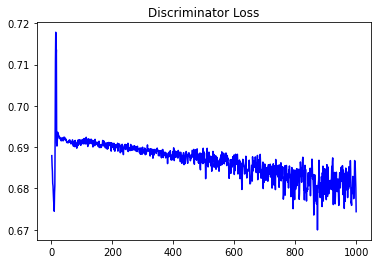

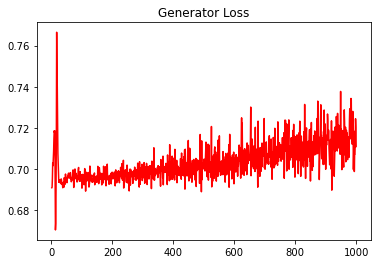

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10317094394961493


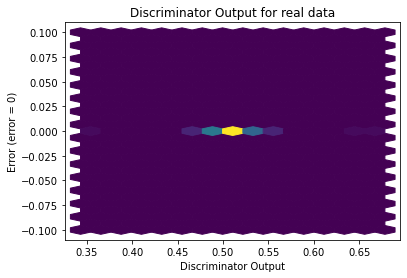

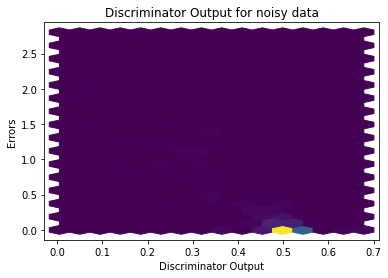

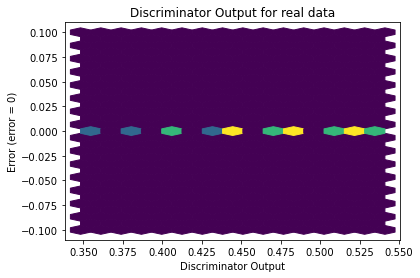

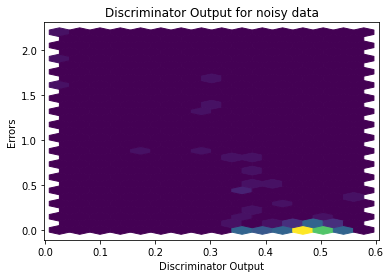

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


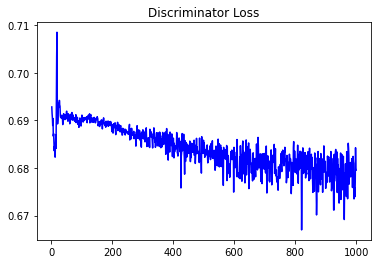

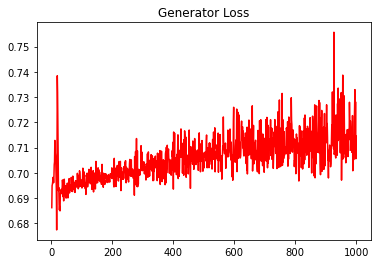

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08538360437752807


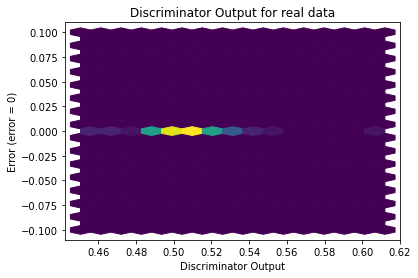

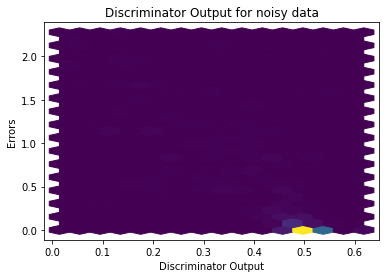

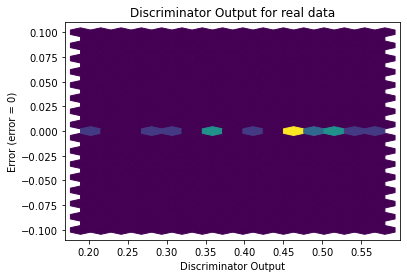

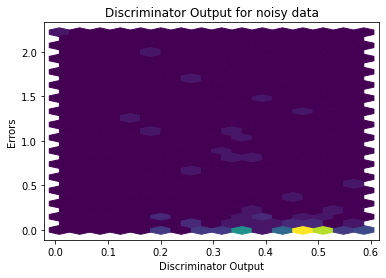

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8180]], requires_grad=True)
